# Roller Coaster Visualization

Roller coasters are thrilling amusement park rides designed to make us squeal and scream! They take ypu up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today, we will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

In [3]:
#Import libraries 
import pandas as pd
import matplotlib.pyplot as plt

Roller coasters are often split into two main categories based on their construction material: wood or steel. Rankings for the best **wood** and **steel** roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively

In [4]:
wood_winners = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel_winners = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
coaster_data = pd.read_csv('roller_coasters.csv')

In [5]:
print(wood_winners.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB
None


In [6]:
print(steel_winners.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB
None


In [7]:
print(coaster_data.head(), coaster_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB
            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda   

In [8]:
wood_rankings = wood_winners[['Rank', 'Name', 'Park', 'Year of Rank']]
steel_rankings = steel_winners[['Rank', 'Name', 'Park', 'Year of Rank']]

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster’s name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

In [9]:
def PlotCoasterRankingOverTime(CoasterName, ParkName, Rankings, Type):
    CoasterRankings = Rankings[(Rankings.Name == CoasterName) & (Rankings.Park == ParkName)]

    ax = plt.subplot()
    plt.plot(range(len(CoasterRankings['Year of Rank'])), CoasterRankings.Rank, marker = 'o')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title(CoasterName + ', ' + ParkName + ', ' + Type + " Coaster")
    ax.invert_yaxis()
    ax.set_xticks(range(len(CoasterRankings['Year of Rank'])))
    ax.set_xticklabels(CoasterRankings['Year of Rank'])
    ax.set_yticks(CoasterRankings.Rank)
    plt.show()
    plt.clf()

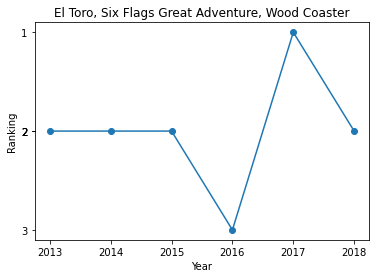

In [10]:
PlotCoasterRankingOverTime('Boulder Dash', 'Lake Compounce', wood_rankings, 'Wood')
PlotCoasterRankingOverTime('El Toro', 'Six Flags Great Adventure', wood_rankings, 'Wood')

Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters’ names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

In [11]:
def PlotTwoCoasterRankingsOverTime(Coaster1Name, Park1Name, Coaster2Name, \
                                   Park2Name, Rankings, Type):
    #Find the rankings for the unique name/park pairs
    Coaster1Rankings = Rankings[(Rankings.Name == Coaster1Name) & \
        (Rankings.Park == Park1Name)]
    Coaster2Rankings = Rankings[(Rankings.Name == Coaster2Name) & \
            (Rankings.Park == Park2Name)]
    
    ax = plt.subplot()
    plt.plot(Coaster1Rankings['Year of Rank'], Coaster1Rankings.Rank, marker = 'o')
    plt.plot(Coaster2Rankings['Year of Rank'], Coaster2Rankings.Rank, marker = 'o')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title(Coaster1Name + ' VS ' + Coaster2Name + ', ' + Type + " Coasters")
    plt.legend([Coaster1Name + ',' + Park1Name, Coaster2Name + ', ' \
    + Park2Name], loc = 'best')
    ax.invert_yaxis()
    plt.show()
    plt.clf()
    

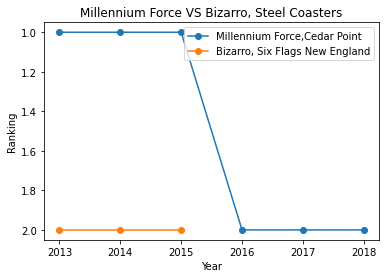

In [12]:
PlotTwoCoasterRankingsOverTime('Millennium Force', 'Cedar Point', 'Bizarro', 'Six Flags New England', steel_rankings, 'Steel')

Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your function should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower.

In [13]:
def PlotCoasterRankedOverNvsTime(n, Rankings):
    #New Dataframe for coasters in ranking <= n
    CoasterRankedOverN = Rankings[(Rankings.Rank <= 5)].reset_index()
    ax = plt.subplot()
    #find all unique coasters based on Name and Park pairs
    UniqueCoasters = CoasterRankedOverN.groupby(['Name', 'Park']).size().reset_index()
    # for loop graphs a line for each unique coaster after finding matching
    # data in the CoasterRankedOverN dataframe
    for row in UniqueCoasters.index:
        CoasterRankings = CoasterRankedOverN[(CoasterRankedOverN['Name'] == \
                UniqueCoasters['Name'][row]) & (CoasterRankedOverN['Park'] == \
                        UniqueCoasters['Park'][row])]
        plt.plot(CoasterRankings['Year of Rank'], CoasterRankings.Rank, \
        label = UniqueCoasters['Name'][row], marker = 'o')
    ax.invert_yaxis()
    plt.title('Coasters Ranked ' + str(n) + ' and Up')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(loc = 'best')
    plt.show()
    plt.clf()

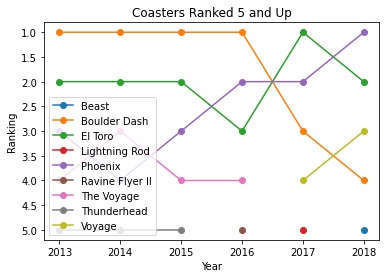

In [14]:
PlotCoasterRankedOverNvsTime(5, wood_rankings)

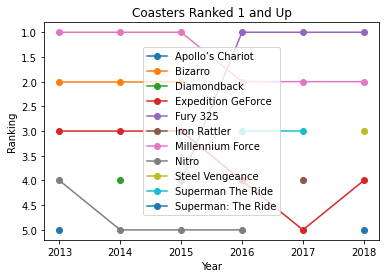

In [17]:
PlotCoasterRankedOverNvsTime(1, steel_rankings)

Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

In [26]:
def PlotRollerCoasterHistogram(data, column_name):
    ax = plt.subplot()
    plt.hist(data[column_name].dropna())
    plt.xlabel(column_name)
    plt.ylabel('Number of Coasters')
    plt.title('Coaster Data Histogram')
    plt.show()
    plt.clf()

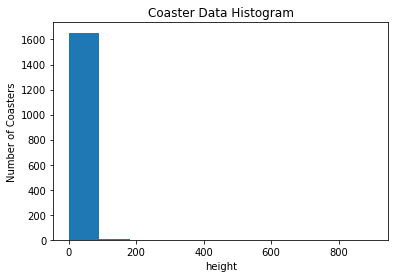

In [27]:
PlotRollerCoasterHistogram(coaster_data, 'speed')
PlotRollerCoasterHistogram(coaster_data, 'height')

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

In [28]:
def PlotCoasterInversionBarGraph(data, park_name):
    InversionsForPark = data[data.park == park_name]
    ax = plt.subplot()
    plt.bar(range(len(InversionsForPark.num_inversions)), InversionsForPark.num_inversions)
    plt.xlabel('Coasters')
    plt.ylabel('Number of Inversions')
    plt.title(park_name)
    ax.set_xticks(range(len(InversionsForPark.num_inversions)))
    ax.set_xticklabels(InversionsForPark.name, rotation = 90)
    plt.show()
    plt.clf()

In [32]:
print(coaster_data['park'].head())

0      Parc Asterix
1     Bobbejaanland
2      Terra Mítica
3    Walygator Parc
4            Le Pal
Name: park, dtype: object


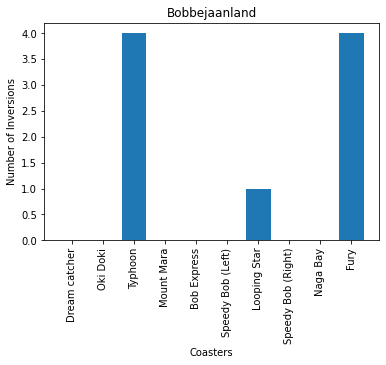

In [34]:
PlotCoasterInversionBarGraph(coaster_data, "Parc Asterix")
PlotCoasterInversionBarGraph(coaster_data, "Bobbejaanland")

Write a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

In [35]:
def PlotPieChartOfOpenClosedCoasterStatusAtAllParks(data):
    num_closed = data[data.status == 'status.closed.definitely'].status.count()
    num_open = data[data.status == 'status.operating'].status.count()
    plt.pie([num_open, num_closed], labels = ['Operating', 'Closed'], autopct = '%0.2f%%')
    plt.title('Percentae of Operating VS Closed Roller Coasters')
    plt.axis('equal')
    plt.show()
    plt.clf()

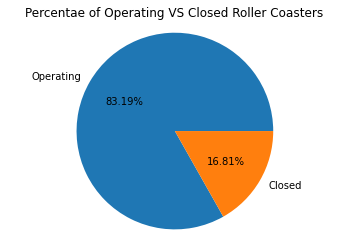

In [36]:
PlotPieChartOfOpenClosedCoasterStatusAtAllParks(coaster_data)

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.

In [37]:
def PlotScatterChartofTwoDataSets(data, col1_name, col2_name):
    plt.scatter(data[col1_name], data[col2_name])
    plt.title('Scatter Plot Comparing Coaster ' + col1_name + ' with ' + col2_name)
    plt.xlabel(col1_name)
    plt.ylabel(col2_name)
    plt.show()
    plt.clf()

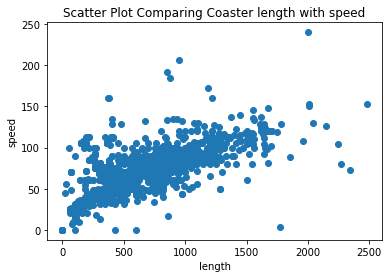

In [39]:
PlotScatterChartofTwoDataSets(coaster_data, 'length', 'speed')